In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from astropy.io.votable import parse_single_table

In [2]:
#GOODS SOUTH STAR CHART within 100 arcmin, ordered by magnitude; downloaded using ASQL from GAIA DR3
table = parse_single_table("CANDLES2")
CANDLES=table.array

ra=[] #Right Ascension
dec=[] #Declination
mag=[] #Magnitude
ra_error = []
dec_error = []

for i in CANDLES[:]:    #Converts all mag, ra, and dec into floats from strings
    if i[2] != '':  #Some observations do not have a magnitude; so these are ignored
        if float(i[69]) < 16: #Faint stars of mag 16 and above are ignored (too faint for AO NGS)
            mag.append(float(i[69])) 
            ra.append(float(i[5])) 
            dec.append(float(i[7]))
            #ra_error.append(float(i[6]))
            #dec_error.append(float((i[8])))

# order=np.argsort(mag) #We want to have our ra, dec, and mags in order of faintest to brightest
# #This is done for graphical purposes; fainter stars (graphically smaller) are plotted over brighter ones
# mag=np.asarray(mag)[order]
# ra=np.asarray(ra)[order]    
# dec=np.asarray(dec)[order]    
# ra_error=np.asarray(ra_error)[order]
# dec_error=np.asarray(dec_error)[order]

scales=[] #Need scale values for the markersize of each star on a scatter plot to illustrate magnitude

# for i in mag: #Linear with intensity from 16, by converting back to intensity.
#     I = 10**((16-i)/2.5)
#     scales.append(I/10)

for i in mag: #Linear with magnitude from 16, i.e mag 12 star has marker size 2 times larger than a mag 14 star.
    I = (16-i)
    scales.append(I*10)
    


In [11]:
def equidistant(ra,dec,ra0,dec0):
    cosc = (np.sin(dec0)*np.sin(dec)+np.cos(dec0)*np.cos(dec)*np.cos(ra-ra0))
    c = np.arccos(cosc)
    k = c/np.sin(c)
    
    x = k * np.cos(dec) * np.sin(ra-ra0)
    y = k * (np.cos(dec)*np.sin(dec) - np.sin(dec0)*np.cos(dec)*np.cos(ra-ra0))
    
    return x,y
    

(-0.03, 0.03)

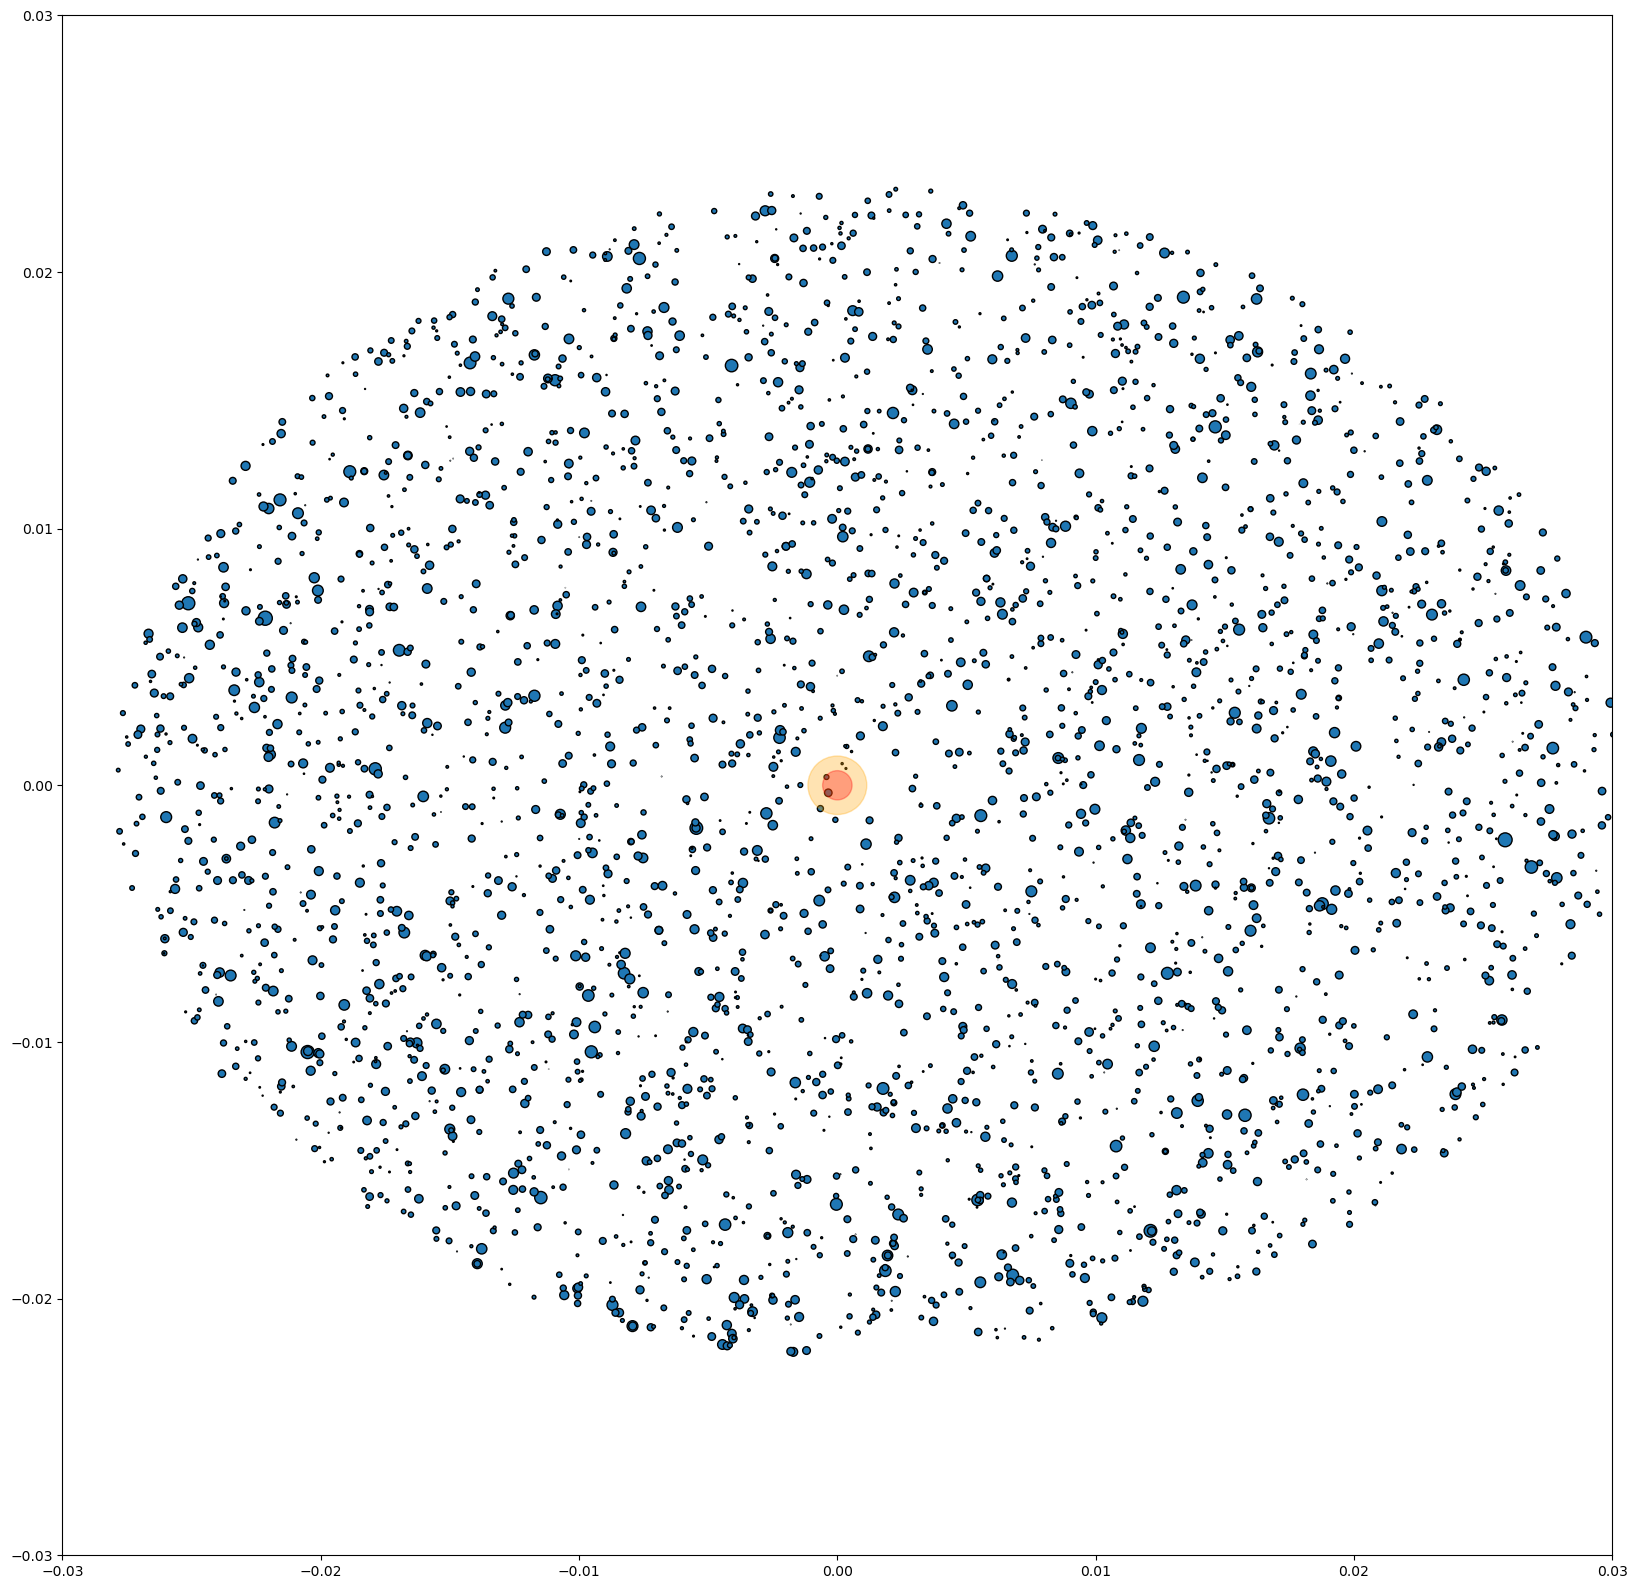

In [21]:
ra0=53.022 #Projection axis ra value / centre of FOV
dec0=-27.8 #Projection axis dec value / centre of FOV

ra0_rad=np.radians(ra0) #Turns ra0 into radians
dec0_rad=np.radians(dec0) #Turns dec0 into radians

x=[] #x-coords of stars on gnomonic projection plane
y=[] #y-coords of stars on gnomonic projection plane
for i in range(0,len(ra)): #Takes every ra and dec value for the file and turns them into x and y under projection
    xval,yval=equidistant(np.radians(ra[i]),np.radians(dec[i]),ra0_rad,dec0_rad) #Angles need to be in radians
    
    x.append(xval)
    y.append(yval)
    

void,FOV_radius=equidistant(ra0_rad,dec0_rad+np.radians(5/60),ra0_rad,dec0_rad) #Calculates radius of the 10' FOV on the plane

#Plot of stars and FOVs
fig, ax = plt.subplots(figsize=(20,20))
plt.scatter(x,y,s=scales,edgecolors='black')

FOV_techfield = plt.Circle((0,0), FOV_radius, color='orange', alpha=0.3) #Technical field FOV
FOV_sciencefield = plt.Circle((0,0), FOV_radius/2, color='red', alpha=0.3) #Science field FOV
ax.add_patch(FOV_techfield)
ax.add_patch(FOV_sciencefield)

plt.xlim(-0.03,0.03)
plt.ylim(-0.03,0.03)

In [22]:
# STARS WITHIN FOV

def distance(x,y): #Distance between FOV centre (0,0) and (x,y):
    d = np.sqrt(x**2+y**2)
    return d

sciencestars_index= [] #Index of stars inside science field
techstars_index = [] #Index of stars inside technical field and not in science field

for i in range(0,len(x)): #Retrieves indexes of stars within the radii.
    if distance(x[i],y[i]) < FOV_radius:
        if distance(x[i],y[i]) < FOV_radius/2:
            sciencestars_index.append(i)
        else:
            techstars_index.append(i)
    

print(len(techstars_index)+len(sciencestars_index))

5


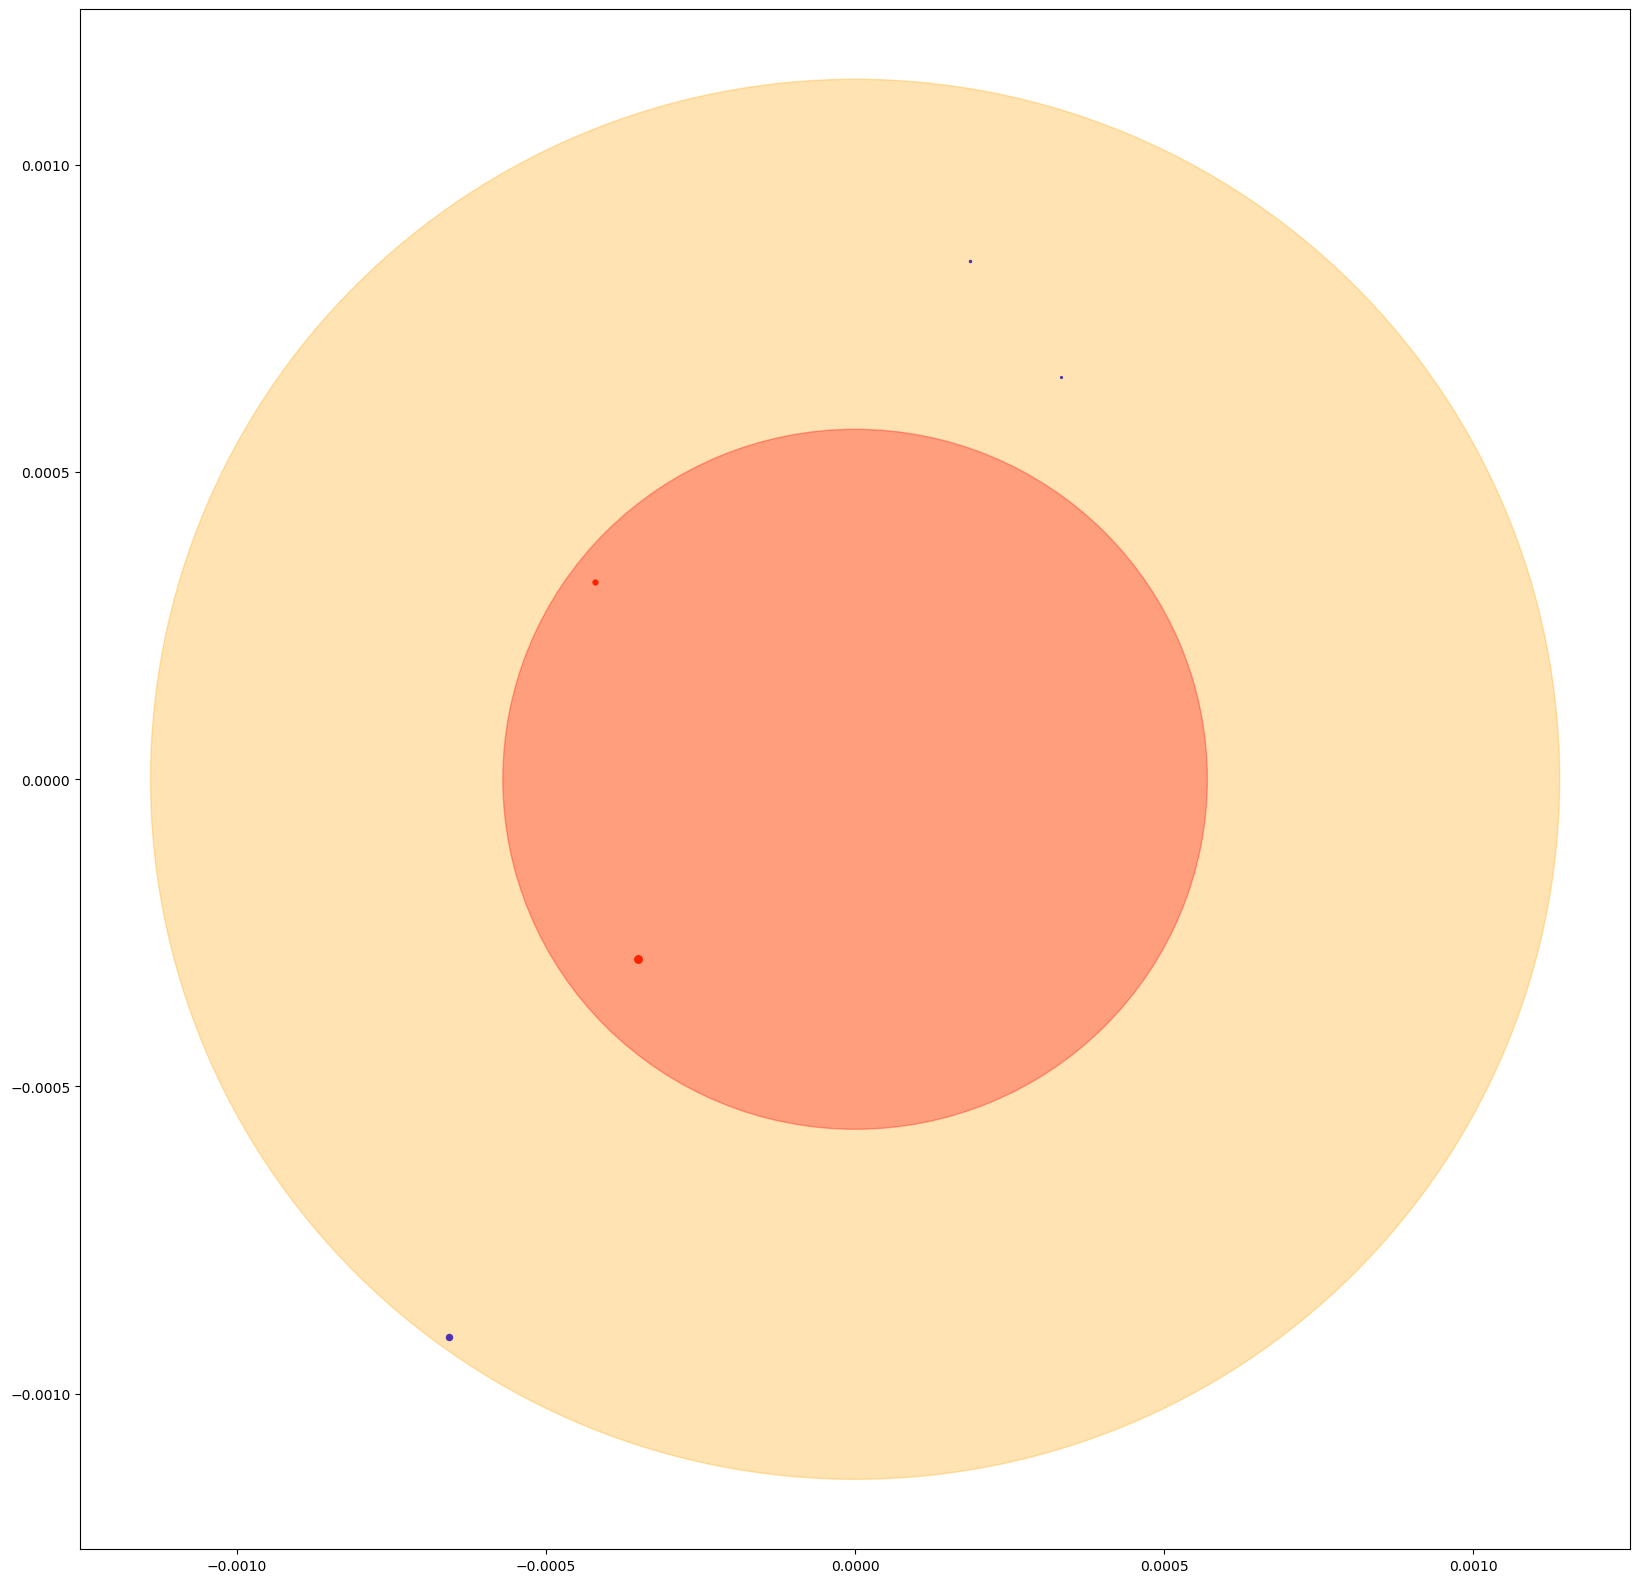

In [23]:
fig, ax = plt.subplots(figsize=(20,20))

for i in techstars_index:
    plt.scatter(x[i],y[i],s=scales[i],color='blue')
for i in sciencestars_index:    
    plt.scatter(x[i],y[i],s=scales[i],color='red')
    
FOV_techfield = plt.Circle((0,0), FOV_radius, color='orange', alpha=0.3) #Technical field FOV
FOV_sciencefield = plt.Circle((0,0), FOV_radius/2, color='red', alpha=0.3) #Science field FOV
ax.add_patch(FOV_techfield)
ax.add_patch(FOV_sciencefield)